In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt

# 基本训练循环
已经了解了tensors, variables, gradient tape, 和modules。在这篇教程，您将把它们放在一起训练模型。<br><br>

TensorFlow 同样具有更高层次的神经网络应用程序编程接口 tf.Keras。它提供有效的抽象来减少代码量。然而，这篇教程中，您将使用基础类。

---

## 解决机器学习问题

   1. 获得训练数据。
   2. 定义模型。
   3. 定义损失函数。
   4. 遍历训练数据，从目标值计算损失。
   5. 计算该损失的梯度，并使用optimizer调整变量以适合数据。
   6. 计算结果。
   
您将开发一个简单的线性模型, , 其中包含两个变量: $w$(权重) 和 $b$(偏差)。


### 数据
通过将高斯（即正态分布）噪声添加到直线上的点而合成的一些数据。

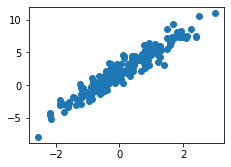

In [4]:
# 真实的W和B，以及样本的数量
TRUE_W=3.0
TRUE_B=2.0
NUM_EXAMPLE=200

x=tf.random.normal([NUM_EXAMPLE])
noise=tf.random.normal([NUM_EXAMPLE])
y=x*TRUE_W+TRUE_B+noise

# 绘图展示
plt.figure(figsize=(3.5,2.5))
plt.scatter(x,y)
plt.show()

### 定义模型


In [14]:
class MyMoudle(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(0.3)
        self.b=tf.Variable(0.2)
    def __call__(self,x):
        return self.w*x+self.b
model=MyMoudle()
print("Variables:", model.variables)
assert model(3.0).numpy()==tf.constant(1.1).numpy()

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.2>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.3>)


### 定义损失函数
定义标准的L2损失，也称为“均方误差”:

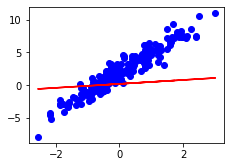

In [20]:
def loss(target_y,pre_y):
    return tf.reduce_mean(tf.square(target_y-pre_y))
plt.figure(figsize=(3.5,2.5))
plt.scatter(x,y,c='b')
plt.plot(x,model(x),c='r')
plt.show()

### 定义训练循环

    1. 发送一批输入值，通过模型生成输出值
    2. 通过比较输出值与输出（标签），来计算损失值
    3. 使用梯度带(GradientTape)找到梯度值
    4. 使用这些梯度优化变量


In [96]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss=loss(y,model(x))
        dw,db=t.gradient(current_loss,[model.w,model.b])
        learning_rate=learning_rate-1.0/len(x)
        model.w.assign_sub(learning_rate*dw)
        model.b.assign_sub(learning_rate*db)

        

In [92]:
model = MyMoudle()

# 收集W值和b值的历史记录以供以后绘制
Ws, bs = [], []
epochs = range(1000)

# 定义用于训练的循环
def training_loop(model, x, y):

  for epoch in epochs:
    # 用单个大批次处理更新模型
    train(model, x, y, learning_rate=0.1)

    # 在更新之前进行跟踪
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))


Starting: W=2.93 b=2.01, loss=0.93610
Epoch  0: W=2.93 b=2.01, loss=0.93610
Epoch  1: W=2.93 b=2.01, loss=0.93610
Epoch  2: W=2.93 b=2.01, loss=0.93610
Epoch  3: W=2.93 b=2.01, loss=0.93610
Epoch  4: W=2.93 b=2.01, loss=0.93610
Epoch  5: W=2.93 b=2.01, loss=0.93610
Epoch  6: W=2.93 b=2.01, loss=0.93610
Epoch  7: W=2.93 b=2.01, loss=0.93610
Epoch  8: W=2.93 b=2.01, loss=0.93610
Epoch  9: W=2.93 b=2.01, loss=0.93610
Epoch 10: W=2.93 b=2.01, loss=0.93610
Epoch 11: W=2.93 b=2.01, loss=0.93610
Epoch 12: W=2.93 b=2.01, loss=0.93610
Epoch 13: W=2.93 b=2.01, loss=0.93610
Epoch 14: W=2.93 b=2.01, loss=0.93610
Epoch 15: W=2.93 b=2.01, loss=0.93610
Epoch 16: W=2.93 b=2.01, loss=0.93610
Epoch 17: W=2.93 b=2.01, loss=0.93610
Epoch 18: W=2.93 b=2.01, loss=0.93610
Epoch 19: W=2.93 b=2.01, loss=0.93610
Epoch 20: W=2.93 b=2.01, loss=0.93610
Epoch 21: W=2.93 b=2.01, loss=0.93610
Epoch 22: W=2.93 b=2.01, loss=0.93610
Epoch 23: W=2.93 b=2.01, loss=0.93610
Epoch 24: W=2.93 b=2.01, loss=0.93610
Epoch 25: W=

Epoch 241: W=2.93 b=2.01, loss=0.93610
Epoch 242: W=2.93 b=2.01, loss=0.93610
Epoch 243: W=2.93 b=2.01, loss=0.93610
Epoch 244: W=2.93 b=2.01, loss=0.93610
Epoch 245: W=2.93 b=2.01, loss=0.93610
Epoch 246: W=2.93 b=2.01, loss=0.93610
Epoch 247: W=2.93 b=2.01, loss=0.93610
Epoch 248: W=2.93 b=2.01, loss=0.93610
Epoch 249: W=2.93 b=2.01, loss=0.93610
Epoch 250: W=2.93 b=2.01, loss=0.93610
Epoch 251: W=2.93 b=2.01, loss=0.93610
Epoch 252: W=2.93 b=2.01, loss=0.93610
Epoch 253: W=2.93 b=2.01, loss=0.93610
Epoch 254: W=2.93 b=2.01, loss=0.93610
Epoch 255: W=2.93 b=2.01, loss=0.93610
Epoch 256: W=2.93 b=2.01, loss=0.93610
Epoch 257: W=2.93 b=2.01, loss=0.93610
Epoch 258: W=2.93 b=2.01, loss=0.93610
Epoch 259: W=2.93 b=2.01, loss=0.93610
Epoch 260: W=2.93 b=2.01, loss=0.93610
Epoch 261: W=2.93 b=2.01, loss=0.93610
Epoch 262: W=2.93 b=2.01, loss=0.93610
Epoch 263: W=2.93 b=2.01, loss=0.93610
Epoch 264: W=2.93 b=2.01, loss=0.93610
Epoch 265: W=2.93 b=2.01, loss=0.93610
Epoch 266: W=2.93 b=2.01,

Epoch 464: W=2.93 b=2.01, loss=0.93610
Epoch 465: W=2.93 b=2.01, loss=0.93610
Epoch 466: W=2.93 b=2.01, loss=0.93610
Epoch 467: W=2.93 b=2.01, loss=0.93610
Epoch 468: W=2.93 b=2.01, loss=0.93610
Epoch 469: W=2.93 b=2.01, loss=0.93610
Epoch 470: W=2.93 b=2.01, loss=0.93610
Epoch 471: W=2.93 b=2.01, loss=0.93610
Epoch 472: W=2.93 b=2.01, loss=0.93610
Epoch 473: W=2.93 b=2.01, loss=0.93610
Epoch 474: W=2.93 b=2.01, loss=0.93610
Epoch 475: W=2.93 b=2.01, loss=0.93610
Epoch 476: W=2.93 b=2.01, loss=0.93610
Epoch 477: W=2.93 b=2.01, loss=0.93610
Epoch 478: W=2.93 b=2.01, loss=0.93610
Epoch 479: W=2.93 b=2.01, loss=0.93610
Epoch 480: W=2.93 b=2.01, loss=0.93610
Epoch 481: W=2.93 b=2.01, loss=0.93610
Epoch 482: W=2.93 b=2.01, loss=0.93610
Epoch 483: W=2.93 b=2.01, loss=0.93610
Epoch 484: W=2.93 b=2.01, loss=0.93610
Epoch 485: W=2.93 b=2.01, loss=0.93610
Epoch 486: W=2.93 b=2.01, loss=0.93610
Epoch 487: W=2.93 b=2.01, loss=0.93610
Epoch 488: W=2.93 b=2.01, loss=0.93610
Epoch 489: W=2.93 b=2.01,

Epoch 680: W=2.93 b=2.01, loss=0.93610
Epoch 681: W=2.93 b=2.01, loss=0.93610
Epoch 682: W=2.93 b=2.01, loss=0.93610
Epoch 683: W=2.93 b=2.01, loss=0.93610
Epoch 684: W=2.93 b=2.01, loss=0.93610
Epoch 685: W=2.93 b=2.01, loss=0.93610
Epoch 686: W=2.93 b=2.01, loss=0.93610
Epoch 687: W=2.93 b=2.01, loss=0.93610
Epoch 688: W=2.93 b=2.01, loss=0.93610
Epoch 689: W=2.93 b=2.01, loss=0.93610
Epoch 690: W=2.93 b=2.01, loss=0.93610
Epoch 691: W=2.93 b=2.01, loss=0.93610
Epoch 692: W=2.93 b=2.01, loss=0.93610
Epoch 693: W=2.93 b=2.01, loss=0.93610
Epoch 694: W=2.93 b=2.01, loss=0.93610
Epoch 695: W=2.93 b=2.01, loss=0.93610
Epoch 696: W=2.93 b=2.01, loss=0.93610
Epoch 697: W=2.93 b=2.01, loss=0.93610
Epoch 698: W=2.93 b=2.01, loss=0.93610
Epoch 699: W=2.93 b=2.01, loss=0.93610
Epoch 700: W=2.93 b=2.01, loss=0.93610
Epoch 701: W=2.93 b=2.01, loss=0.93610
Epoch 702: W=2.93 b=2.01, loss=0.93610
Epoch 703: W=2.93 b=2.01, loss=0.93610
Epoch 704: W=2.93 b=2.01, loss=0.93610
Epoch 705: W=2.93 b=2.01,

Epoch 893: W=2.93 b=2.01, loss=0.93610
Epoch 894: W=2.93 b=2.01, loss=0.93610
Epoch 895: W=2.93 b=2.01, loss=0.93610
Epoch 896: W=2.93 b=2.01, loss=0.93610
Epoch 897: W=2.93 b=2.01, loss=0.93610
Epoch 898: W=2.93 b=2.01, loss=0.93610
Epoch 899: W=2.93 b=2.01, loss=0.93610
Epoch 900: W=2.93 b=2.01, loss=0.93610
Epoch 901: W=2.93 b=2.01, loss=0.93610
Epoch 902: W=2.93 b=2.01, loss=0.93610
Epoch 903: W=2.93 b=2.01, loss=0.93610
Epoch 904: W=2.93 b=2.01, loss=0.93610
Epoch 905: W=2.93 b=2.01, loss=0.93610
Epoch 906: W=2.93 b=2.01, loss=0.93610
Epoch 907: W=2.93 b=2.01, loss=0.93610
Epoch 908: W=2.93 b=2.01, loss=0.93610
Epoch 909: W=2.93 b=2.01, loss=0.93610
Epoch 910: W=2.93 b=2.01, loss=0.93610
Epoch 911: W=2.93 b=2.01, loss=0.93610
Epoch 912: W=2.93 b=2.01, loss=0.93610
Epoch 913: W=2.93 b=2.01, loss=0.93610
Epoch 914: W=2.93 b=2.01, loss=0.93610
Epoch 915: W=2.93 b=2.01, loss=0.93610
Epoch 916: W=2.93 b=2.01, loss=0.93610
Epoch 917: W=2.93 b=2.01, loss=0.93610
Epoch 918: W=2.93 b=2.01,

ValueError: x and y must have same first dimension, but have shapes (1000,) and (3000,)

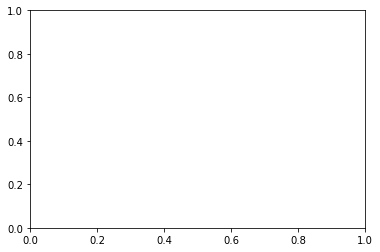

In [97]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))
training_loop(model, x, y)
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()


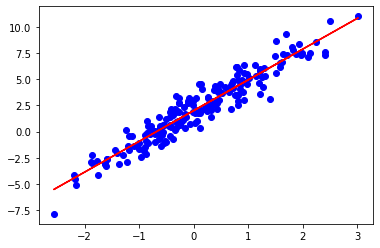

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.9343307> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0091054>


In [27]:
plt.figure()
plt.scatter(x,y,c='b')
plt.plot(x,model(x),c='r')
plt.show()
print(model.w,model.b)

## 使用Keras完成相同的解决方案


In [ ]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # 初始化权重为`5.0`，偏差为`0.0`
    # 实际中应该随机初始化该值
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x, **kwargs):
    return self.w * x + self.b

keras_model = MyModelKeras()

# 使用Keras模型重新进行循环训练
training_loop(keras_model, x, y)

# 您同样可以使用Keras内置的功能保存检查点（checkpoint）
keras_model.save_weights("my_checkpoint")
